<a href="https://colab.research.google.com/github/lvb86/PD_LSTM_GA/blob/main/code/IPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa de análise e limpeza de dados

Preparando dados IBC-BR
por: Leandro Barbosa

In [1]:
import math
import matplotlib.pyplot    as plt
import matplotlib.ticker    as ticker
import matplotlib.style     as style
import numpy                as np
import seaborn              as sns
import pandas               as pd

from urllib.request                 import urlopen
from zipfile                        import ZipFile
from statsmodels.graphics.tsaplots  import plot_acf, plot_pacf
from statsmodels.tsa.seasonal       import seasonal_decompose
from sklearn.metrics                import mean_squared_error
#from sklearn.metrics                import mean_absolute_percentage_error
from sklearn.linear_model           import LinearRegression

stl = style.available
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
prefGo  = 'https://docs.google.com/uc?export=download&id='
urlipca = prefGo + '1l6wRFAprymsQoVoNqAvv1g2EMN2tmVMa'

In [3]:
mes = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
mesN = [1,2,3,4,5,6,7,8,9,10,11,12]

palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r',
            'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
            'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
            'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
            'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
            'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
            'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
            'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',
            'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
            'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',
            'Set3_r', 'Spectral', 'Spectral_r',
            #'Vega10', 'Vega10_r', 'Vega20',
            'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 
            'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
            'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r',
            'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r',
            'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 
            'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r',
            'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
            'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
            'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
            'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
            'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv',
            'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
            #'jet', ##'jet_r', 
            'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',
            'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma',
            'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
            'rocket_r', 'seismic', 'seismic_r', ##'spectral', 'spectral_r', 
            'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r',
            'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
            'terrain', 'terrain_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r',
            'winter', 'winter_r']

# Definições de estilo
if 1==1: #tema Claro para artigo retrato
    DefPalette = palettes[13] #13 Dark2
    DefPaletteHist = 'rocket'
    DefStyle = stl[15] #15 Seaborn-Darkgrid
    DefSize = (10,6) #(17,6)
    DefGrid = ('-')

else: # tema Escuro para apresentação paisagem
    DefPalette = palettes[123] #123 - hsv
    DefPaletteHist = 'rocket'
    DefStyle = stl[4] #15 dark_background
    DefSize = (10,6) #(17,6)
    DefGrid = (':')
    plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 
                    'ytick.color':'white', 'figure.facecolor':'black'})

In [6]:
ipca

,01/01/1995,"1,66"
0,01/02/1995,1.36
1,01/03/1995,1.51
2,01/04/1995,2.45
3,01/05/1995,2.44
4,01/06/1995,2.70
...,...,...
313,01/03/2021,0.53
314,01/04/2021,0.35
315,01/05/2021,0.57
316,01/06/2021,0.50


In [11]:
ipca = pd.read_csv(urlipca, sep =';' ,decimal=',',parse_dates=True, dayfirst=True,encoding='UTF8', index_col='data' )

ipca.rename(columns={'valor':'ipca'}, inplace = True)
ipca.head(2)

,ipca
data,
1995-01-01,1.66
1995-02-01,1.36


In [12]:
ipca2013_2021 = ipca[(ipca.index.year >= 2013) & (ipca.index.year <= 2021)]

In [13]:
ipca2013_2021.head()

,ipca
data,
2013-01-01,0.65
2013-02-01,0.55
2013-03-01,0.46
2013-04-01,0.53
2013-05-01,0.50


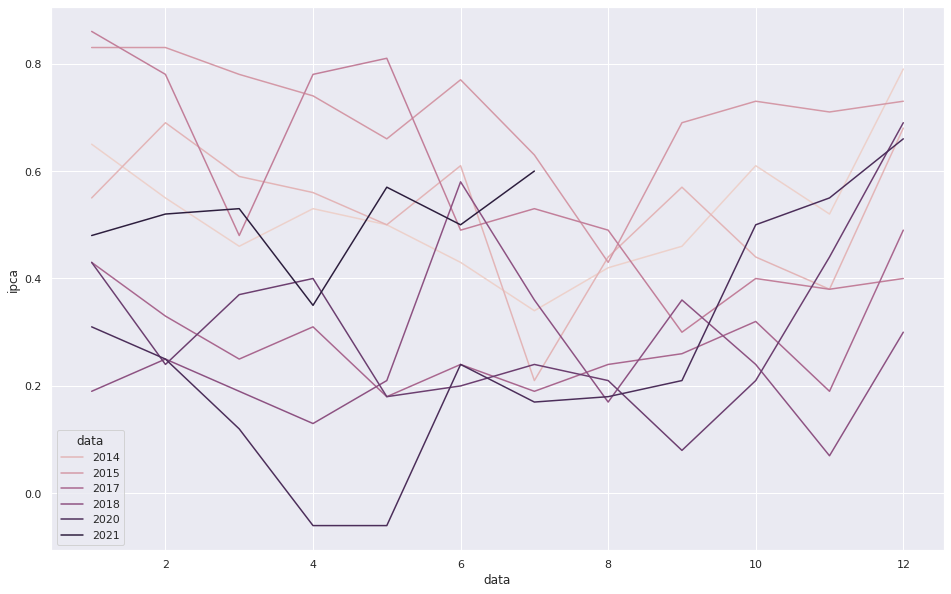

In [14]:
plt.figure(figsize=(16,10))
sns.set_theme()
sns.lineplot(data = ipca2013_2021, x= ipca2013_2021.index.month, y='ipca', hue=ipca2013_2021.index.year)



In [15]:
ipca.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01'],
              dtype='datetime64[ns]', name='data', length=319, freq=None)

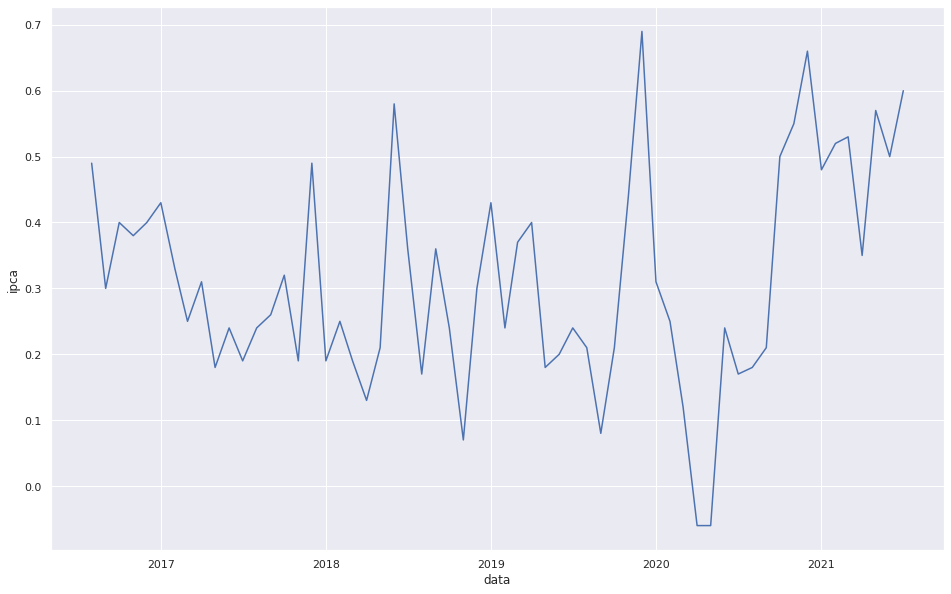

In [16]:
plt.figure(figsize=(16,10))
sns.set_theme()
sns.lineplot(data = ipca.reset_index()[-60:], x= ipca.index[-60:], y='ipca')#, hue=ibcbr.index.year)


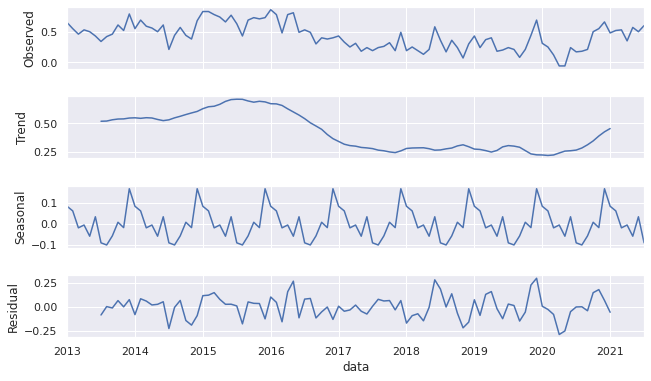

In [17]:
decomposicao = seasonal_decompose(ipca2013_2021.ipca)
decomposicao.plot()
plt.gcf().set_size_inches(DefSize)
plt.show();

In [18]:
decomposicao = seasonal_decompose(ipca2013_2021.ipca, model='multiplicative')
sns.set_theme()
style.use(DefStyle)
ax = decomposicao.plot()   
plt.gcf().set_size_inches(DefSize)

plt.show();


ValueError: ignored

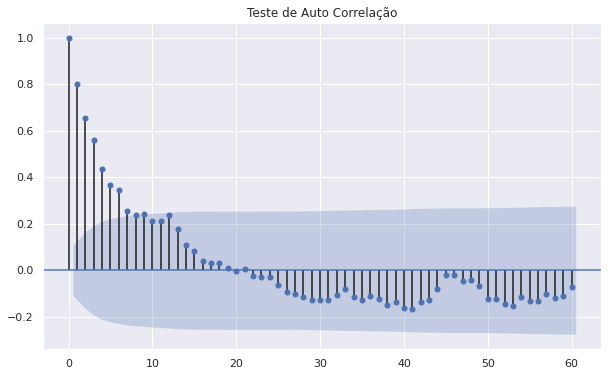

In [19]:
ax = plot_acf(ipca.ipca,lags=60);
style.use(DefStyle) 
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'})

plt.title('Teste de Auto Correlação')
plt.gcf().set_size_inches(10, 6)
plt.grid(True,linestyle = DefGrid)
plt.show();